In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

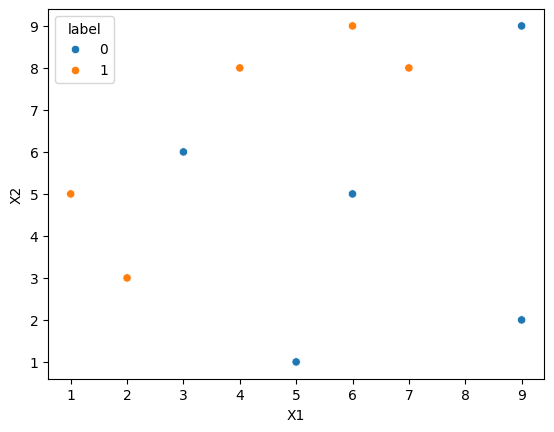

In [ ]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])


In [11]:
df.shape[0]

10

In [7]:
df['weights'] = 1/df.shape[0]

In [323]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [22]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [23]:
X,y

(array([[1, 5],
        [2, 3],
        [3, 6],
        [4, 8],
        [5, 1],
        [6, 9],
        [6, 5],
        [7, 8],
        [9, 9],
        [9, 2]]),
 array([1, 1, 0, 1, 0, 1, 0, 1, 0, 0]))

In [24]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

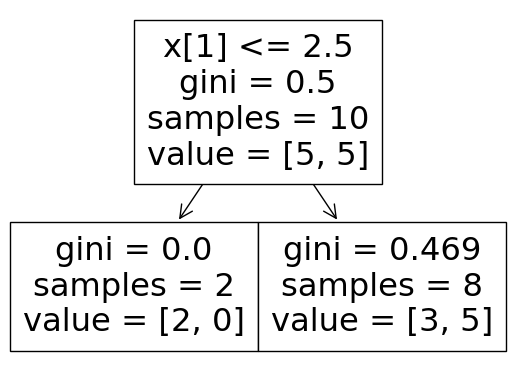

In [25]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

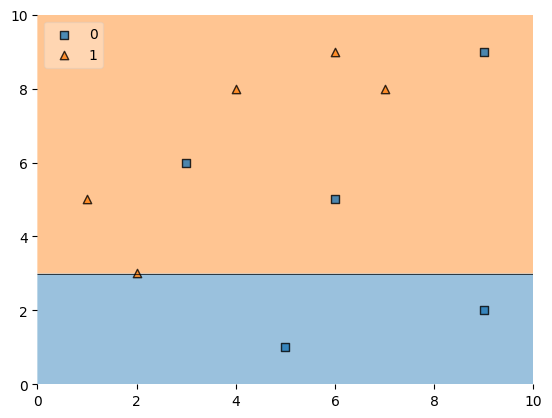

In [29]:
plot_decision_regions(X, y, clf=dt1, legend=2)

In [30]:
df['y_pred'] = dt1.predict(X)

In [331]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [73]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error+0.00001))

In [74]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.4236322638047067

In [75]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [76]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [77]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [78]:
df['updated_weights'].sum()

0.9165153319682015

In [79]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [80]:
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [81]:
df['nomalized_weights'].sum()

1.0

In [82]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [83]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [84]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [85]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [86]:
index_values = create_new_dataset(df)

index_values

[8, 4, 6, 3, 7, 3, 2, 4, 6, 8]

In [87]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [88]:
second_df

,X1,X2,label,weights
8,9,9,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1


In [89]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [90]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [91]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.75, 0.25, 'gini = 0.48\nsamples = 5\nvalue = [2, 3]')]

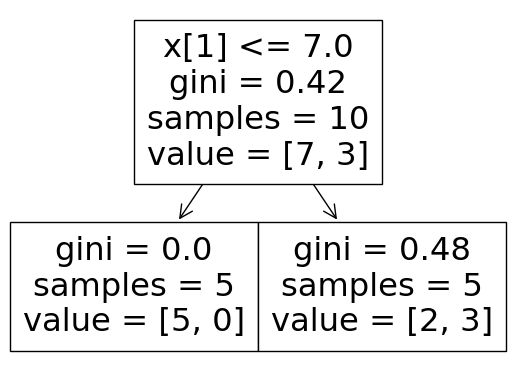

In [92]:
plot_tree(dt2)

<Axes: >

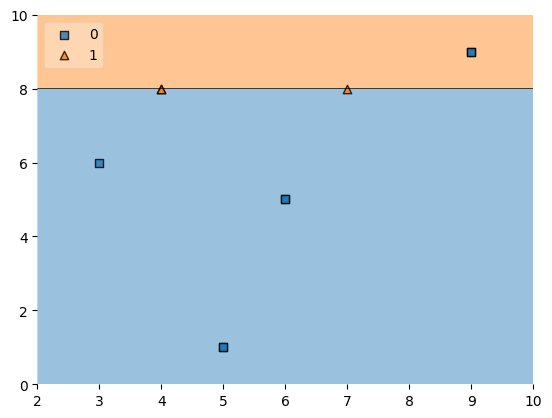

In [93]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [94]:
second_df['y_pred'] = dt2.predict(X)

In [95]:
second_df

,X1,X2,label,weights,y_pred
8,9,9,0,0.1,1
4,5,1,0,0.1,0
6,6,5,0,0.1,0
3,4,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
2,3,6,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,1


In [96]:
alpha2 = calculate_model_weight(0.1)

In [97]:
alpha2

1.0985622911679431

In [98]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [99]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)

In [100]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
8,9,9,0,0.1,1,0.297427
4,5,1,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,1,0.297427


In [101]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [102]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
8,9,9,0,0.1,1,0.297427,0.344313
4,5,1,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
7,7,8,1,0.1,1,0.033622,0.038922
3,4,8,1,0.1,1,0.033622,0.038922
2,3,6,0,0.1,0,0.033622,0.038922
4,5,1,0,0.1,0,0.033622,0.038922
6,6,5,0,0.1,0,0.033622,0.038922
8,9,9,0,0.1,1,0.297427,0.344313


In [103]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [104]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [105]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [106]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
8,9,9,0,0.1,1,0.344313,0.000000,0.344313
4,5,1,0,0.1,0,0.038922,0.344313,0.383235
6,6,5,0,0.1,0,0.038922,0.383235,0.422157
3,4,8,1,0.1,1,0.038922,0.422157,0.461078
7,7,8,1,0.1,1,0.038922,0.461078,0.500000
3,4,8,1,0.1,1,0.038922,0.500000,0.538922
2,3,6,0,0.1,0,0.038922,0.538922,0.577843
4,5,1,0,0.1,0,0.038922,0.577843,0.616765
6,6,5,0,0.1,0,0.038922,0.616765,0.655687
8,9,9,0,0.1,1,0.344313,0.655687,1.000000


In [107]:
index_values = create_new_dataset(second_df)

In [108]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [109]:
third_df

,X1,X2,label,weights
3,4,8,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
6,6,5,0,0.1


In [110]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

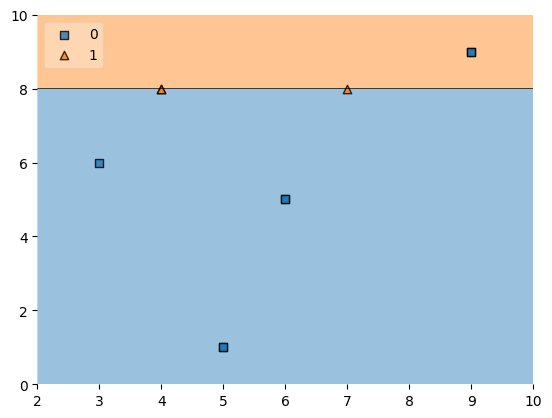

In [111]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [112]:
third_df['y_pred'] = dt3.predict(X)

In [126]:
third_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
6,6,5,0,0.1,1
6,6,5,0,0.1,1
6,6,5,0,0.1,1
6,6,5,0,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0
6,6,5,0,0.1,1


In [127]:
alpha3 = calculate_model_weight(0.4)
alpha3

0.20272005421032954

In [128]:
print(alpha1,alpha2,alpha3)

0.4236322638047067 1.0985622911679431 0.20272005421032954


### Prediction

In [129]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [130]:
dt2.predict(query)

array([0])

In [131]:
dt3.predict(query)

array([0])

In [132]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.7249146091829795

In [136]:
np.sign(1.72)

1.0

In [137]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1])

In [139]:
dt2.predict(query)

array([1])

In [140]:
dt3.predict(query)

array([1])

In [141]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.8776500815735659

In [142]:
np.sign(-0.87)

-1.0